In [1]:
# https://mg.readthedocs.io/importing-local-python-modules-from-jupyter-notebooks/sys-path-in-notebook/path-notebook.html
import os
import sys
sys.path.insert(0, os.path.abspath('../*'))

In [2]:
sample_data = {
  "base_texts": [
    "Make $10,000 a month from home",
    "Earn $10,000 a month with no effort"
  ],
  "target_texts": [
    "Start your own business and make $10,000 a month",
    "Work from home and earn $10,000 a month",
    "Join our team and make $10,000 a month",
    "Maybe do something else",
    "a joke about cats"
  ]
}

In [3]:
from faiss_sim import faiss_similarity
from jaccard_sim import jaccard_similarity
from sklearn_sim import sklearn_similarity
from bert_sim import bert_similarity 
from ensemble_sim import ensemble_similarity

# Run different similarity methods on the sample data
faiss_sim = faiss_similarity(sample_data['base_texts'], sample_data['target_texts'])
jaccard_sim = jaccard_similarity(sample_data['base_texts'], sample_data['target_texts'])
sklearn_sim = sklearn_similarity(sample_data['base_texts'], sample_data['target_texts'])
bert_sim = bert_similarity(sample_data['base_texts'], sample_data['target_texts'])
ensemble_sim = ensemble_similarity(sample_data['base_texts'], sample_data['target_texts'])

print("FAISS Similarity: ", faiss_sim)
print("Jaccard Similarity: ", jaccard_sim)
print("Sklearn Similarity: ", sklearn_sim)
print("BERT Similarity: ", bert_sim)
print("Ensemble Similarity: ", ensemble_sim)

/Users/bartolkaruza/Library/Caches/pypoetry/virtualenvs/toody-backend-5GZvBIx7-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FAISS Similarity:  [[0.6434870958328247, 0.3755216598510742, 0.342104971408844, 0.0, 0.0], [0.3470152020454407, 0.18512094020843506, 0.1686476469039917, 0.0, 0.0]]
Jaccard Similarity:  [[0.36363636363636365, 0.5555555555555556, 0.4, 0.0, 0.0], [0.23076923076923078, 0.36363636363636365, 0.25, 0.0, 0.0]]
Sklearn Similarity:  [[0.34210500968570384, 0.6434870546208119, 0.37552166787599567, 0.0, 0.0], [0.16864761736862974, 0.3470151994702313, 0.18512103817410747, 0.0, 0.0]]
BERT Similarity:  [[0.7932041883468628, 0.9226463437080383, 0.643203854560852, 0.0991639643907547, 0.056110139936208725], [0.8140597343444824, 0.7266680002212524, 0.6894547343254089, 0.18970969319343567, 0.07577794790267944]]
Ensemble Similarity:  [[0.44974282305163077, 0.5248547566758139, 0.37254221309494656, 0.0, 0.0], [0.24881068339443377, 0.29859083443834333, 0.2012562283593664, 0.0, 0.0]]


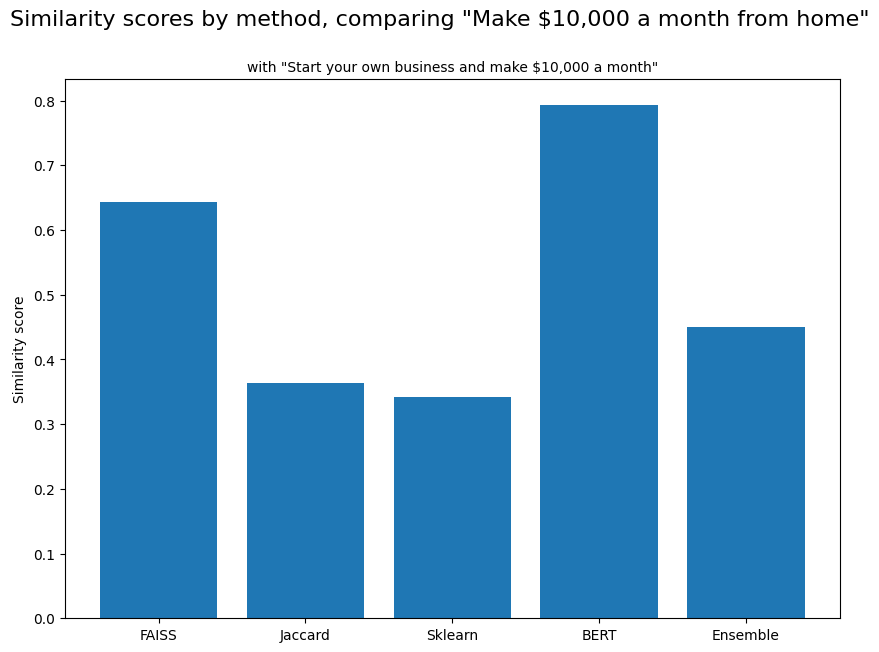

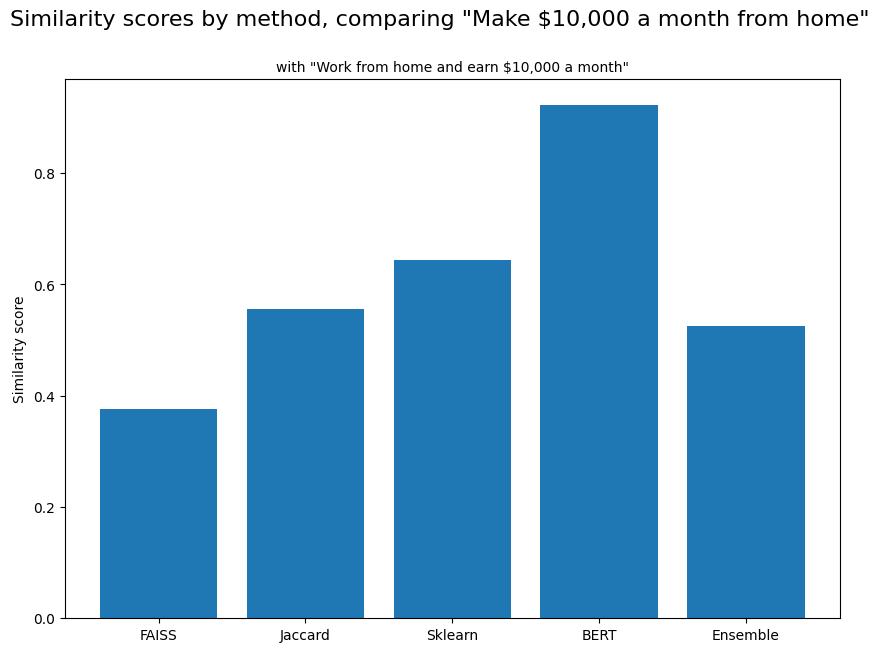

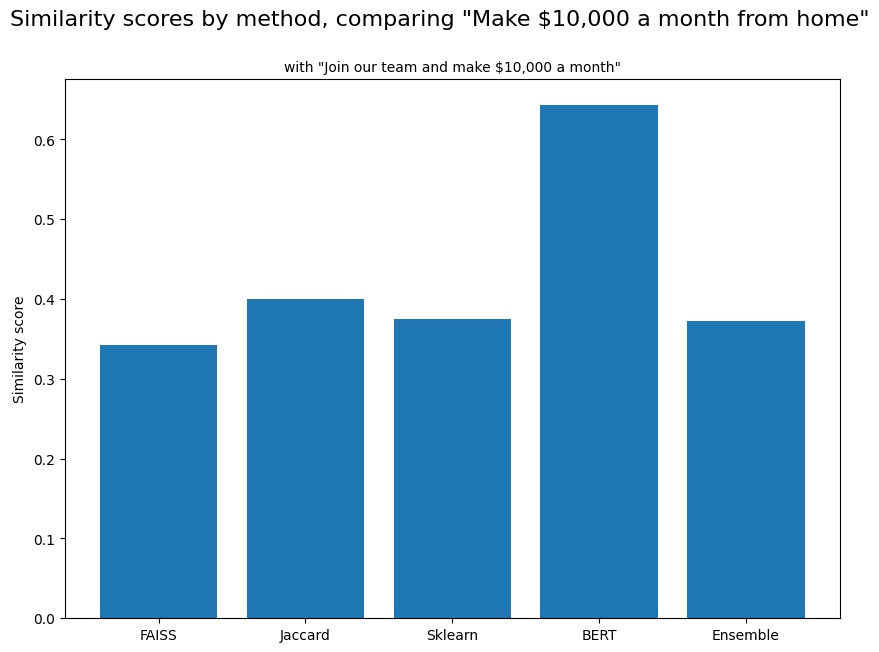

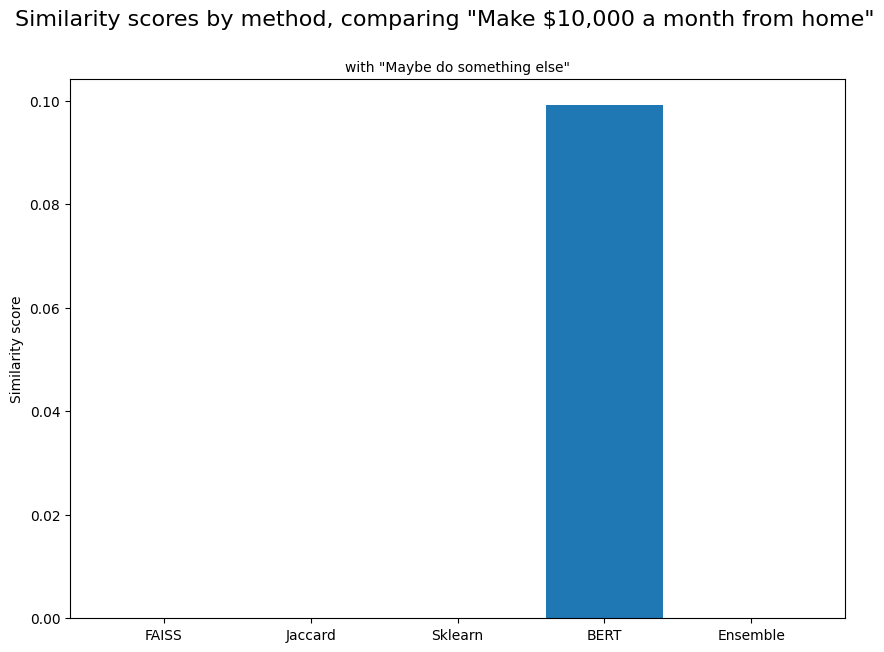

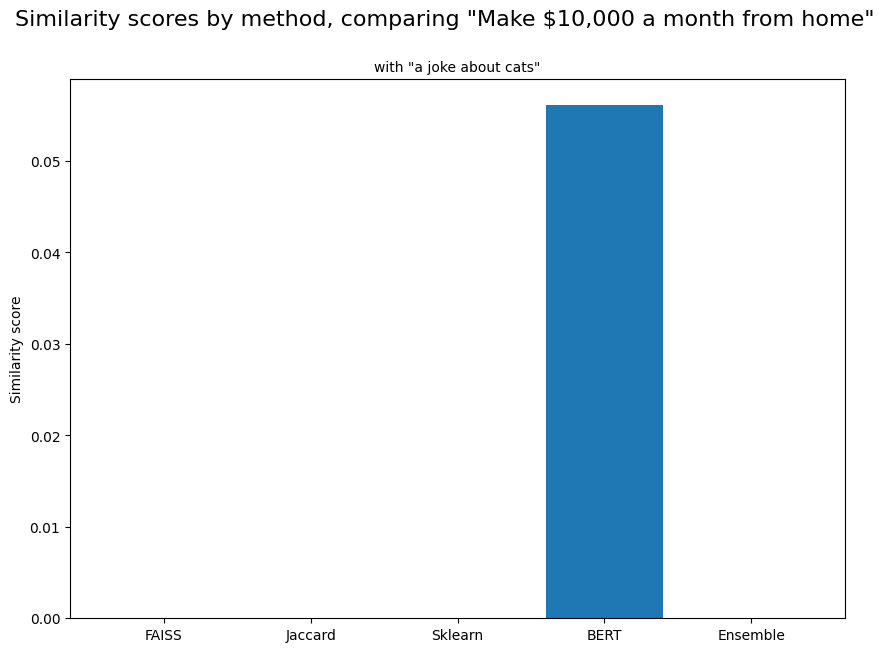

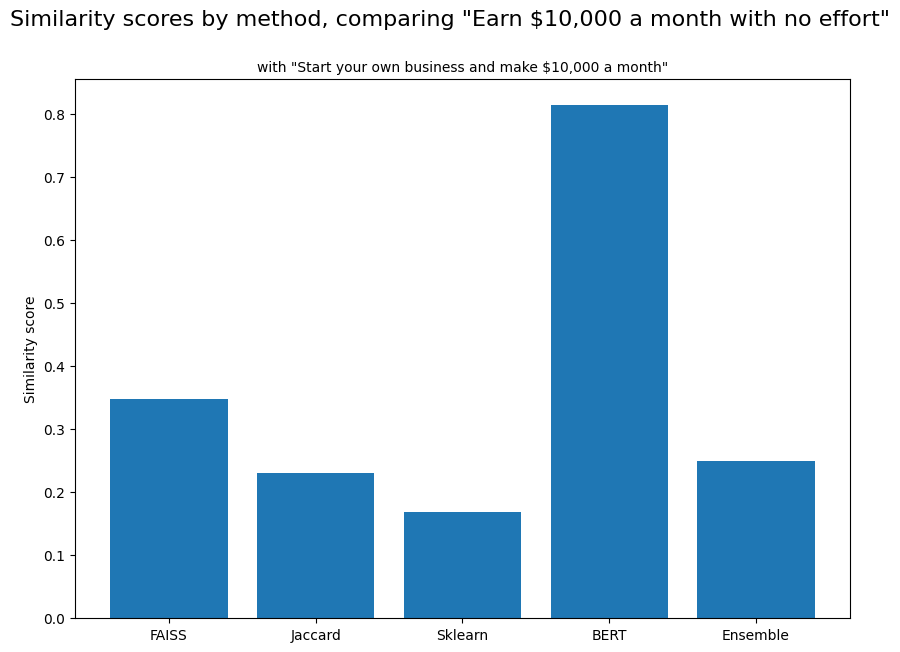

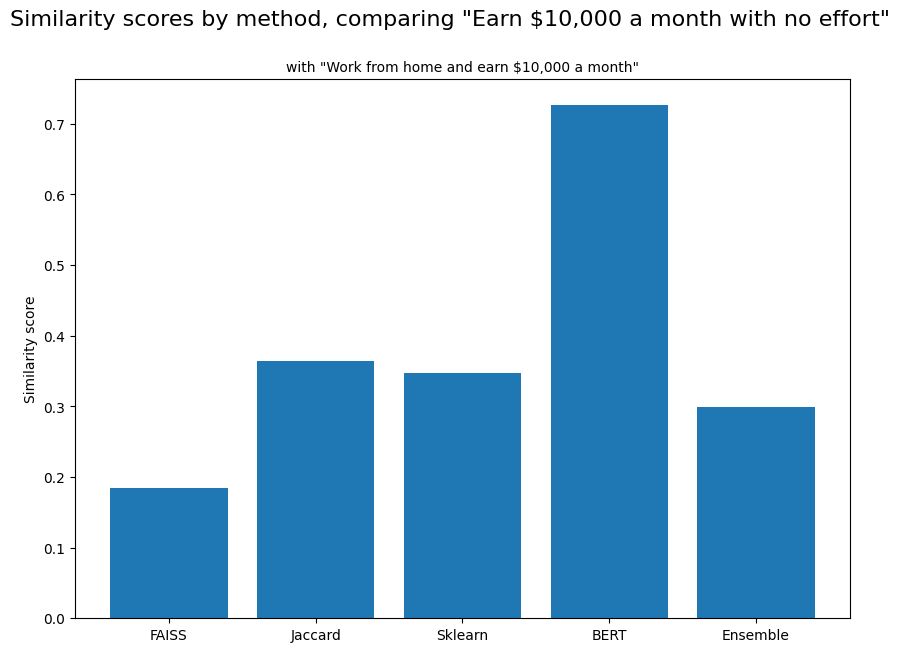

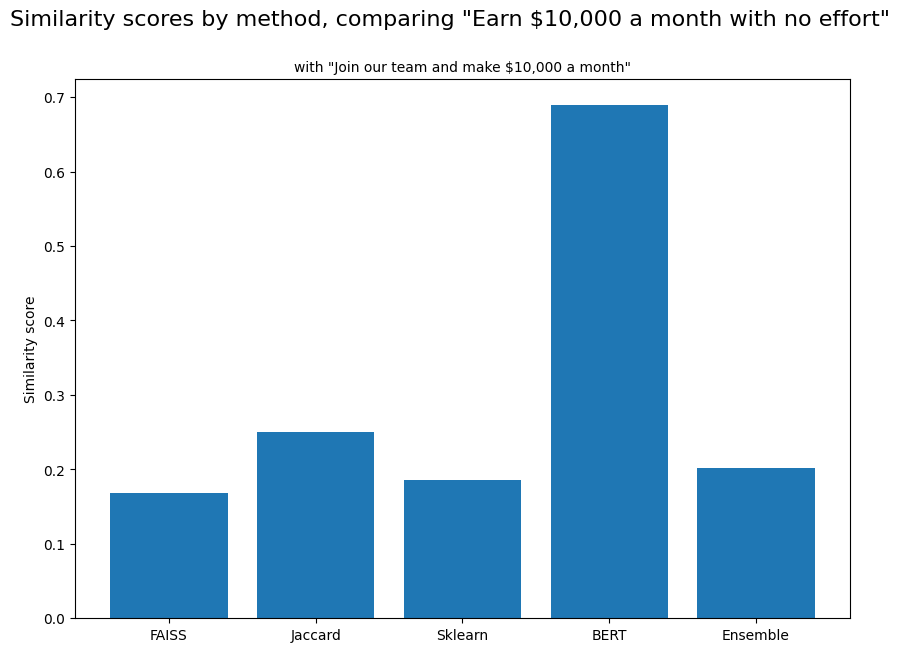

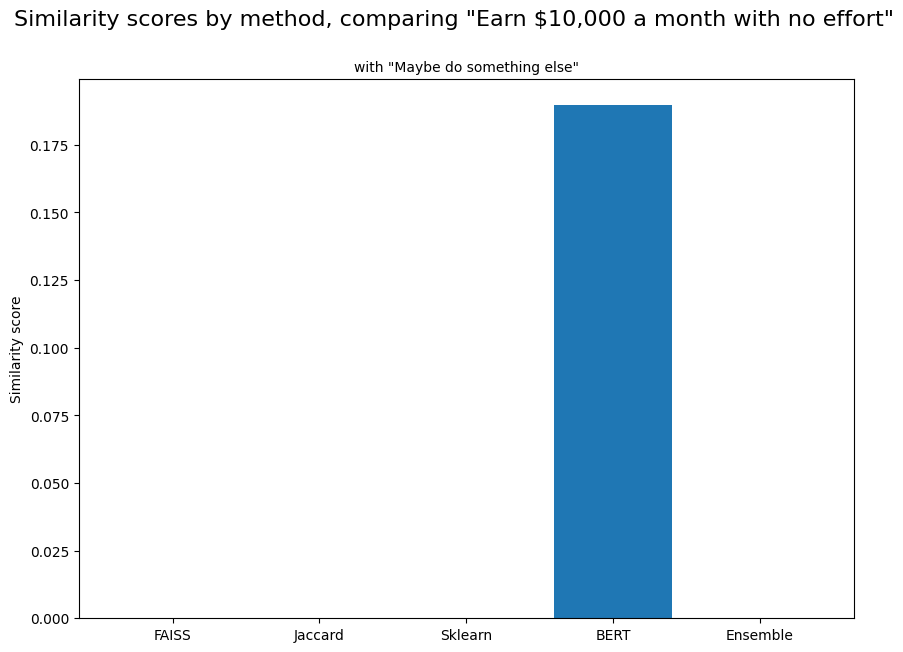

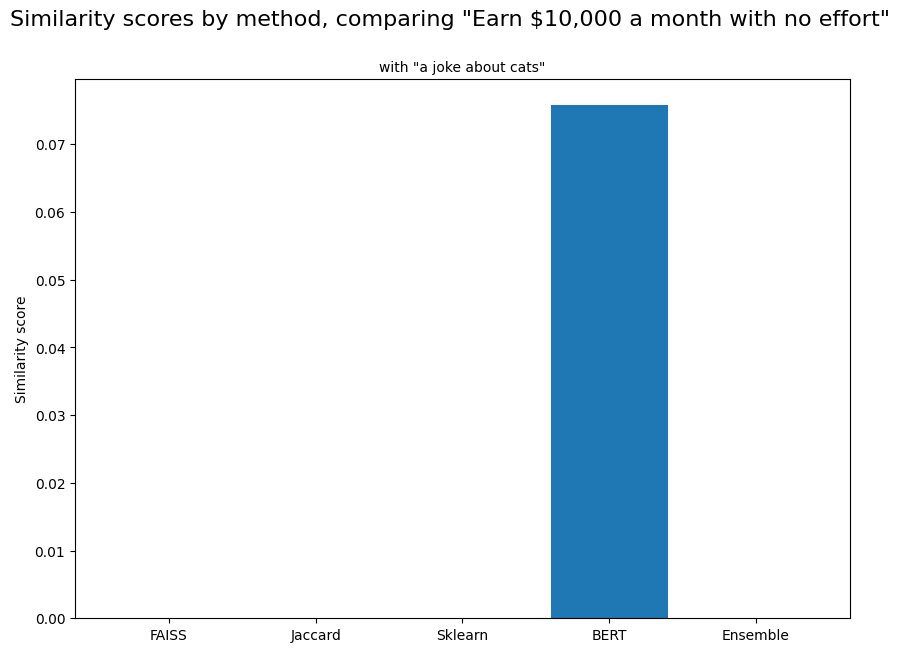

In [19]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['FAISS', 'Jaccard', 'Sklearn', 'BERT', 'Ensemble']

for i in range(len(faiss_sim[0])):
    for j in range(len(faiss_sim)):
        base_text = sample_data['base_texts'][i]
        target_text = sample_data['target_texts'][j]
        similarity_scores = [faiss_sim[j][i], jaccard_sim[j][i], sklearn_sim[j][i], bert_sim[j][i], ensemble_sim[j][i]]
        plt.figure(figsize=(10,7)) # creates a new figure
        plt.suptitle(f'Similarity scores by method, comparing "{base_text}"', fontsize=16)  # Main title
        plt.title(f'with "{target_text}"', fontsize=10)  # Subtitle
        plt.bar(range(len(methods)), similarity_scores, tick_label=methods)
        plt.ylabel('Similarity score')
        plt.show()

In [21]:
import timeit

# Define the number of repetitions
repetitions = 1000

# Define a method for performance testing
def performance_test(func, base_texts, target_texts, repetitions):
    start_time = timeit.default_timer()
    for _ in range(repetitions):
        func(base_texts, target_texts)
    elapsed = timeit.default_timer() - start_time
    return elapsed

# Measure the time spent
faiss_time = performance_test(faiss_similarity, sample_data['base_texts'], sample_data['target_texts'], repetitions)
jaccard_time = performance_test(jaccard_similarity, sample_data['base_texts'], sample_data['target_texts'], repetitions)
sklearn_time = performance_test(sklearn_similarity, sample_data['base_texts'], sample_data['target_texts'], repetitions)
bert_time = performance_test(bert_similarity, sample_data['base_texts'], sample_data['target_texts'], repetitions)
ensemble_time = performance_test(ensemble_similarity, sample_data['base_texts'], sample_data['target_texts'], repetitions)

print(f"FAISS time: {faiss_time}")
print(f"Jaccard time: {jaccard_time}")
print(f"Sklearn time: {sklearn_time}")
print(f"BERT time: {bert_time}")
print(f"Ensemble time: {ensemble_time}")

FAISS time: 0.5310489580006106
Jaccard time: 0.18993283400777727
Sklearn time: 0.43378199999278877
BERT time: 221.32802270899992
Ensemble time: 1.1180251660116483
